In [1]:
%%time
dataset_name = "W19_comb"
df_list = [ "BES_Panel" ]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

if "id" in BES_Panel.columns:
    BES_Panel = BES_Panel.set_index("id").sort_index()

(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')



Toggle code

var_type (7911, 14)
Wall time: 25.7 s


In [2]:
BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES_Panelv02",compression='zip')
BES_Panel = BES_Panel.set_index("id")
BES_Panel = BES_Panel.sort_index()

pan_dataset_allr_values = pan_dataset_allr_values.set_index("id").loc[BES_Panel.index]

In [ ]:
# gender, Age, values

In [3]:
search(BES_Panel,"gender")

genderRolesW10    30237
impGenderW14       7801
gender            96090
dtype: int64

In [5]:
BES_Panel["gender"].value_counts(dropna=False)

Female    52687
Male      43403
NaN         916
Name: gender, dtype: int64

In [6]:
pan_dataset_ages.shape, BES_Panel.shape, pan_dataset_allr_values.shape

((97006, 30), (97006, 8079), (97006, 4))

In [14]:
df = pd.DataFrame()

df["Age_at_W10"] = pan_dataset_ages["Age_at_W10"].round()
df["gender"] = BES_Panel["gender"]
df["Social: Liberalism(0) <-> Conservatism(200){uniform}"] = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
df["Economic: Left(0) <-> Right(200){uniform}"] = pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"]

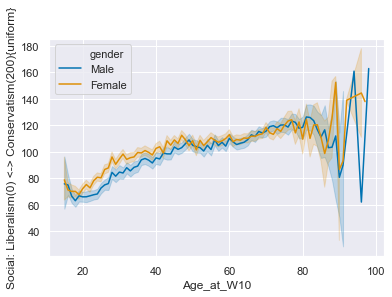

In [15]:
sns.lineplot(data=df, x="Age_at_W10",hue="gender",y="Social: Liberalism(0) <-> Conservatism(200){uniform}")

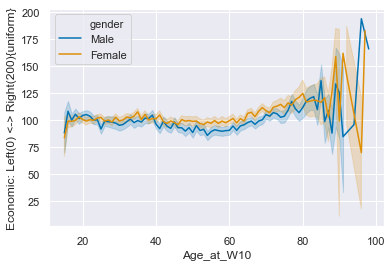

In [16]:
sns.lineplot(data=df, x="Age_at_W10",hue="gender",y="Economic: Left(0) <-> Right(200){uniform}")

In [31]:
df = pd.DataFrame()

df["Age_at_W17"] = (pan_dataset_ages["Age_at_W17"]/2).round()*2
df["gender"] = BES_Panel["gender"]

for val in ["al","lr"]:
    for val_no in [1,2,3,4,5]:
        df[val+str(val_no)+"W17"] = BES_Panel[val+str(val_no)+"W17"].replace("Don't know",np.nan ).cat.codes.replace(-1,np.nan)


# df["Social: Liberalism(0) <-> Conservatism(200){uniform}"] = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
# df["Economic: Left(0) <-> Right(200){uniform}"] = pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"]

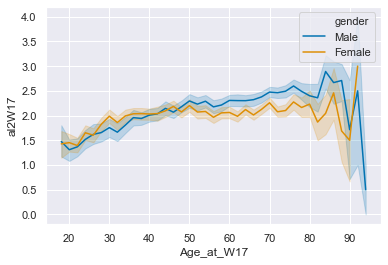

In [32]:
# BES_Panel["al1W17"]
sns.lineplot(data=df, x="Age_at_W17",hue="gender",y="al2W17")

In [52]:
melt_df = pd.melt(df,id_vars = ["Age_at_W17","gender"])
melt_df.columns

Index(['Age_at_W17', 'gender', 'variable', 'value'], dtype='object')

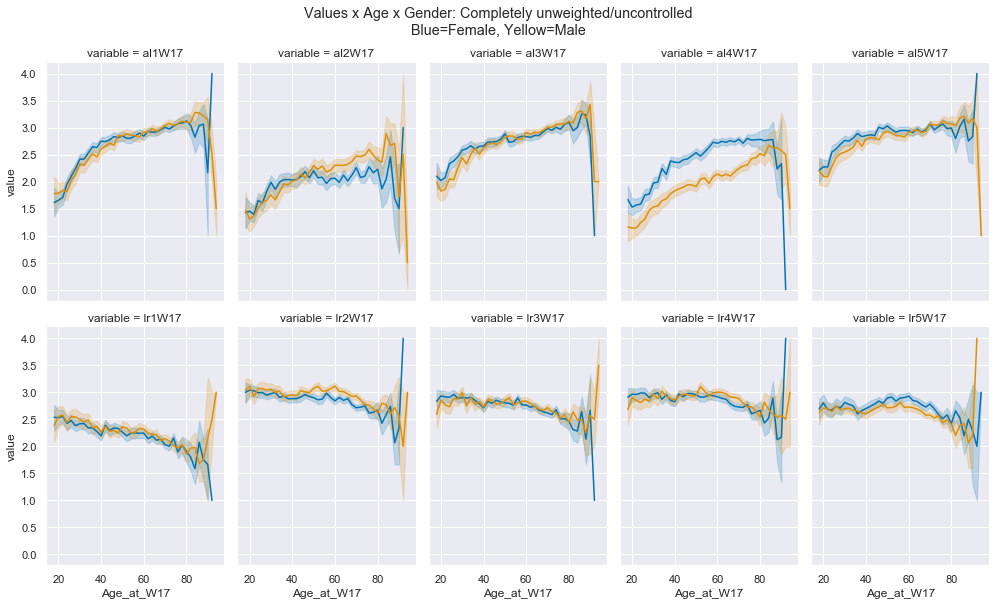

In [82]:
g = sns.FacetGrid(data=melt_df, col="variable", height=4, aspect=.7, col_wrap=5)
g = g.map(sns.lineplot, "Age_at_W17",'value',"gender")
plt.suptitle("Values x Age x Gender: Completely unweighted/uncontrolled\nBlue=Female, Yellow=Male",y=1.05);

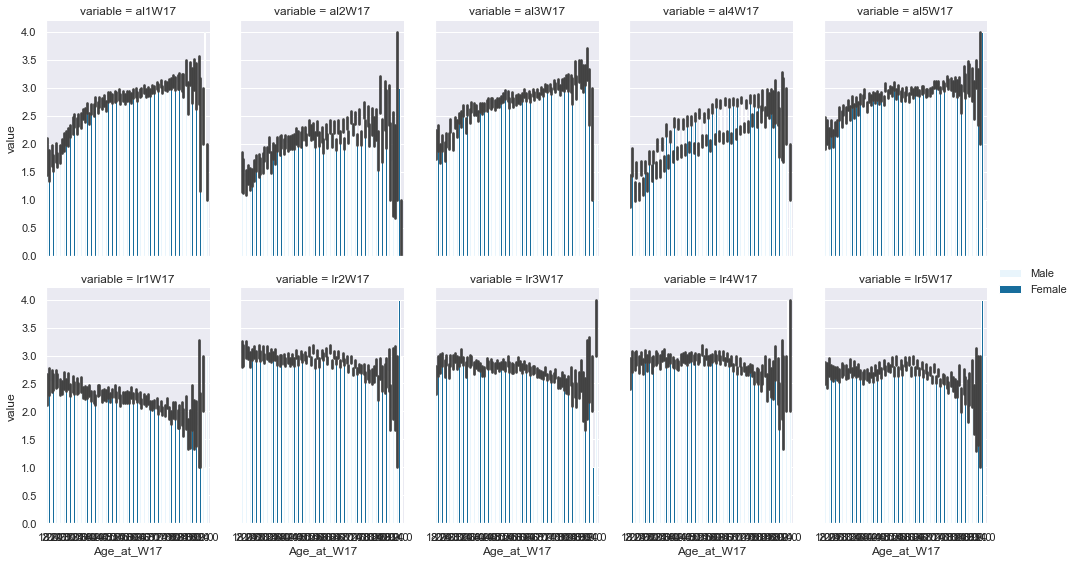

In [59]:
g = sns.FacetGrid(data=melt_df, col="variable", height=4, aspect=.7, col_wrap=5)
g = g.map(sns.barplot, "Age_at_W17",'value',"gender").add_legend()

In [61]:
BES_Panel["al4W17"][BES_Panel["gender"]=="Male"].value_counts()

Agree                         4575
Neither agree nor disagree    3569
Disagree                      3407
Strongly disagree             1947
Strongly agree                1232
Don't know                     613
Name: al4W17, dtype: int64

In [62]:
BES_Panel["al4W17"][BES_Panel["gender"]=="Female"].value_counts()

Agree                         7436
Neither agree nor disagree    3819
Strongly agree                2641
Disagree                      2588
Don't know                    1475
Strongly disagree             1063
Name: al4W17, dtype: int64

In [65]:
BES_Panel["al4W17"].replace("Don't know",np.nan ).cat.codes.replace(-1,np.nan).value_counts()

3.0    12012
2.0     7388
1.0     5995
4.0     3873
0.0     3010
dtype: int64

In [69]:
BES_Panel["al4W17"].replace("Don't know",np.nan ).cat.codes.replace(-1,np.nan).groupby(BES_Panel["gender"]).mean()

gender
Male      1.982213
Female    2.456146
dtype: float64

In [73]:
melt_df[(melt_df["variable"]=="al4W17")&(melt_df["gender"]=="Male")]["value"].value_counts()

3.0    4575
2.0    3569
1.0    3407
0.0    1947
4.0    1232
Name: value, dtype: int64

In [74]:
melt_df[(melt_df["variable"]=="al4W17")&(melt_df["gender"]=="Female")]["value"].value_counts()

3.0    7436
2.0    3819
4.0    2641
1.0    2588
0.0    1063
Name: value, dtype: int64

In [76]:
melt_df[melt_df["variable"]=="al4W17"]

,Age_at_W17,gender,variable,value
291018,64.0,Male,al4W17,NaN
291019,68.0,Female,al4W17,1.0
291020,82.0,Female,al4W17,NaN
291021,56.0,Female,al4W17,NaN
291022,74.0,Female,al4W17,NaN
...,...,...,...,...
388019,28.0,Female,al4W17,1.0
388020,30.0,Male,al4W17,1.0
388021,36.0,Male,al4W17,1.0
388022,26.0,Female,al4W17,2.0


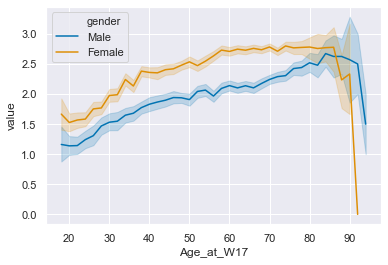

In [77]:
sns.lineplot(data=melt_df[melt_df["variable"]=="al4W17"],
             x="Age_at_W17",hue="gender",y="value")

In [84]:
search(BES_Panel,"p_educationW17")

p_educationW17    34365
dtype: int64

In [88]:
BES_Panel["p_educationW17"].value_counts().head(8).index

University or CNAA first degree (e.g. BA, B.Sc, B.Ed)    7214
CSE grade 1, GCE O level, GCSE, School Certificate       4519
GCE A level or Higher Certificate                        4328
Other technical, professional or higher qualification    3896
University or CNAA higher degree (e.g. M.Sc, Ph.D)       3066
No formal qualifications                                 2169
City & Guilds certificate                                1522
University diploma                                       1388
Name: p_educationW17, dtype: int64

In [101]:
df = pd.DataFrame()

df["Age_at_W17"] = (pan_dataset_ages["Age_at_W17"]/5).round()*5
df["education"] = BES_Panel["p_educationW17"].cat.remove_categories(BES_Panel["p_educationW17"].value_counts().tail(12).index)

for val in ["al","lr"]:
    for val_no in [1,2,3,4,5]:
        df[val+str(val_no)+"W17"] = BES_Panel[val+str(val_no)+"W17"].replace("Don't know",np.nan ).cat.codes.replace(-1,np.nan)


# df["Social: Liberalism(0) <-> Conservatism(200){uniform}"] = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
# df["Economic: Left(0) <-> Right(200){uniform}"] = pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"]
melt_df = pd.melt(df,id_vars = ["Age_at_W17","education"])

Wall time: 1min 3s


Text(0.5, 1.05, 'Values x Age x Education: Completely unweighted/uncontrolled')

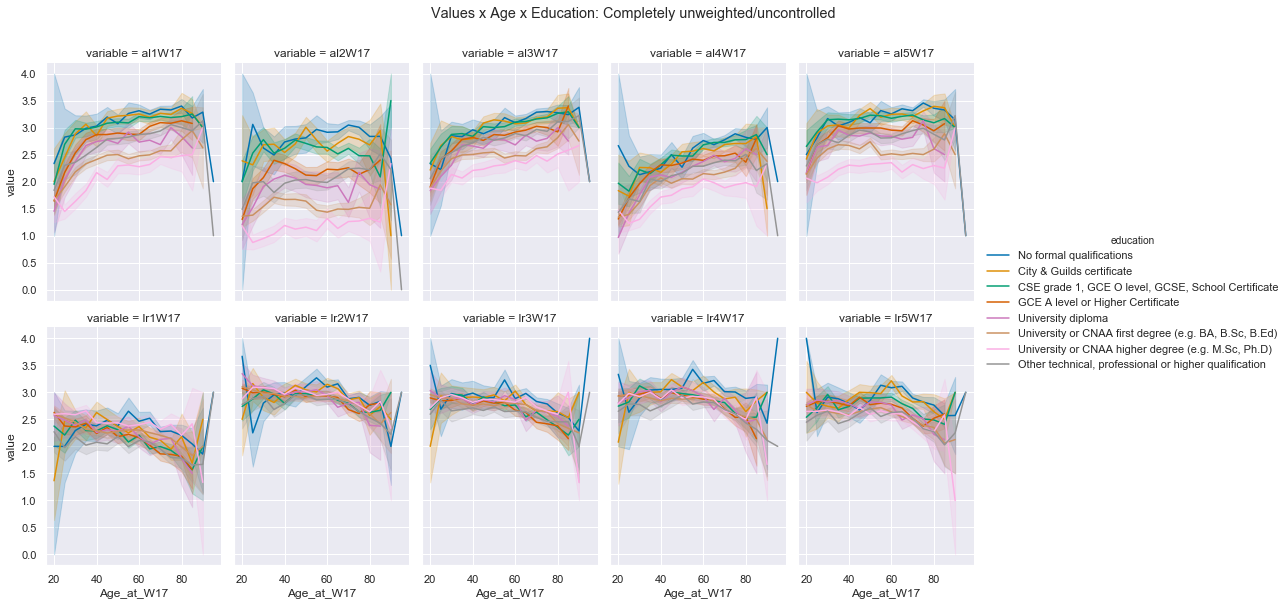

In [114]:
%%time
g = sns.FacetGrid(data=melt_df, col="variable", height=4, aspect=.7, col_wrap=5,
                  hue = "education",hue_order = df["education"].cat.categories,
                  hue_kws = {"ls" : ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']})

g = g.map(sns.lineplot, "Age_at_W17",'value').add_legend()
plt.suptitle("Values x Age x Education: Completely unweighted/uncontrolled",y=1.05);

Wall time: 50 s


Text(0.5, 1.05, 'Values x Age x Education: Completely unweighted/uncontrolled')

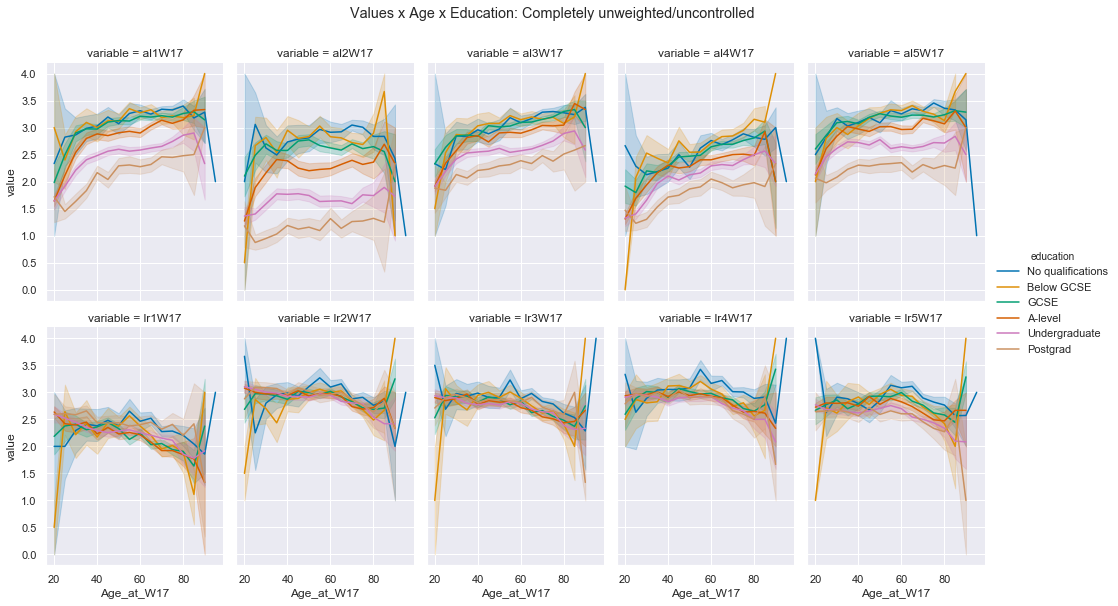

In [117]:
%%time
df = pd.DataFrame()

df["Age_at_W17"] = (pan_dataset_ages["Age_at_W17"]/5).round()*5
df["education"] = BES_Panel["p_edlevelW17"]#.cat.remove_categories(BES_Panel["p_educationW17"].value_counts().tail(12).index)

for val in ["al","lr"]:
    for val_no in [1,2,3,4,5]:
        df[val+str(val_no)+"W17"] = BES_Panel[val+str(val_no)+"W17"].replace("Don't know",np.nan ).cat.codes.replace(-1,np.nan)


# df["Social: Liberalism(0) <-> Conservatism(200){uniform}"] = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
# df["Economic: Left(0) <-> Right(200){uniform}"] = pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"]
melt_df = pd.melt(df,id_vars = ["Age_at_W17","education"])


g = sns.FacetGrid(data=melt_df, col="variable", height=4, aspect=.7, col_wrap=5,
                  hue = "education",hue_order = df["education"].cat.categories,
                  hue_kws = {"ls" : ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']})

g = g.map(sns.lineplot, "Age_at_W17",'value').add_legend()
plt.suptitle("Values x Age x Education: Completely unweighted/uncontrolled",y=1.05);

Wall time: 49.9 s


Text(0.5, 1.05, 'Values x Age x Education: Completely unweighted/uncontrolled')

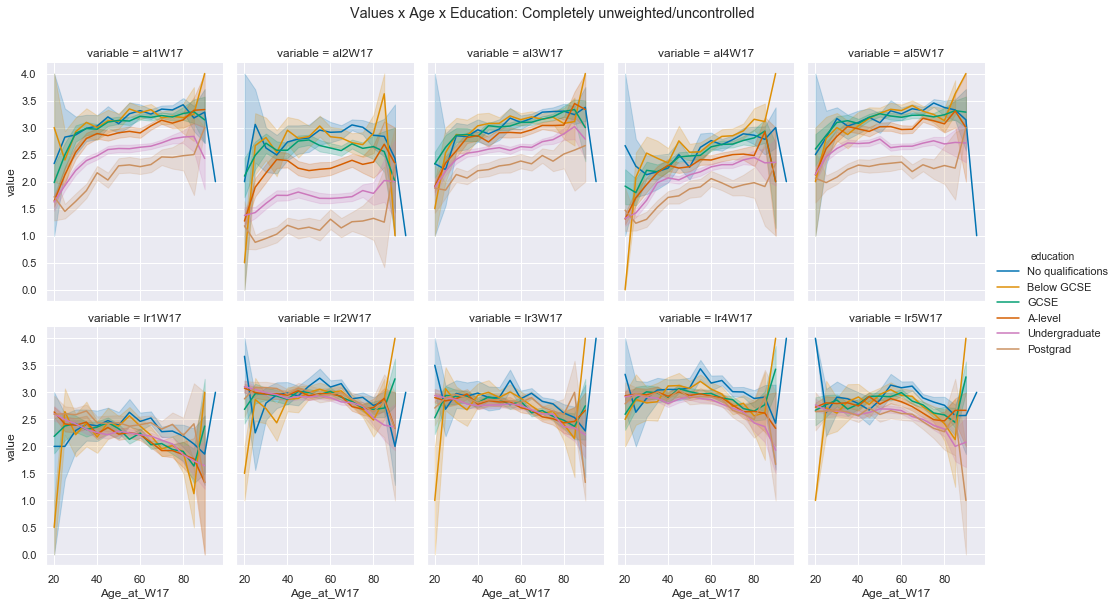

In [119]:
%%time
df = pd.DataFrame()

df["Age_at_W17"] = (pan_dataset_ages["Age_at_W17"]/5).round()*5
df["education"] = BES_Panel["p_edlevelUniW17"]#.cat.remove_categories(BES_Panel["p_educationW17"].value_counts().tail(12).index)

for val in ["al","lr"]:
    for val_no in [1,2,3,4,5]:
        df[val+str(val_no)+"W17"] = BES_Panel[val+str(val_no)+"W17"].replace("Don't know",np.nan ).cat.codes.replace(-1,np.nan)


# df["Social: Liberalism(0) <-> Conservatism(200){uniform}"] = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
# df["Economic: Left(0) <-> Right(200){uniform}"] = pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"]
melt_df = pd.melt(df,id_vars = ["Age_at_W17","education"])


g = sns.FacetGrid(data=melt_df, col="variable", height=4, aspect=.7, col_wrap=5,
                  hue = "education",hue_order = df["education"].cat.categories,
                  hue_kws = {"ls" : ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']})

g = g.map(sns.lineplot, "Age_at_W17",'value').add_legend()
plt.suptitle("Values x Age x Education: Completely unweighted/uncontrolled",y=1.05);

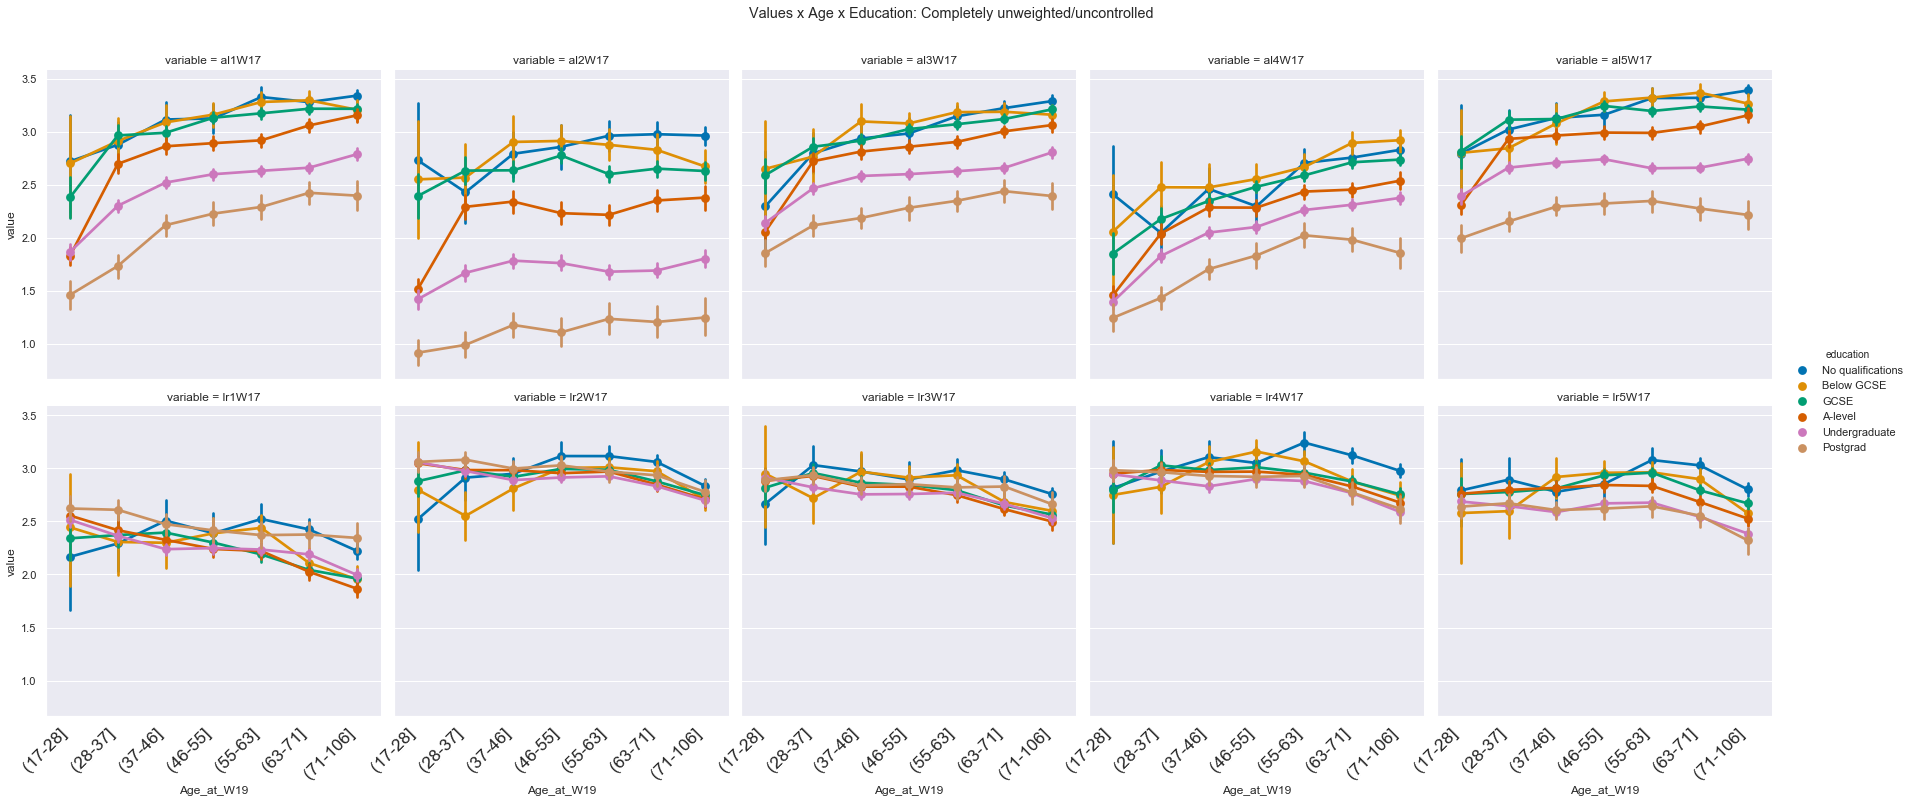

In [179]:
# %%time
df = pd.DataFrame()

df["Age_at_W19"] = pan_dataset_ages["equalisedAgeGroup_at_W19"].copy()
df["Age_at_W19"] = df["Age_at_W19"].cat.rename_categories( ["("+str(int(x.left))+"-"+str(int(x.right))+"]" for x in df["Age_at_W19"].cat.categories] )
#
df["education"] = BES_Panel["p_edlevelUniW17"]#.cat.remove_categories(BES_Panel["p_educationW17"].value_counts().tail(12).index)

for val in ["al","lr"]:
    for val_no in [1,2,3,4,5]:
        df[val+str(val_no)+"W17"] = BES_Panel[val+str(val_no)+"W17"].replace("Don't know",np.nan ).cat.codes.replace(-1,np.nan)


# df["Social: Liberalism(0) <-> Conservatism(200){uniform}"] = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
# df["Economic: Left(0) <-> Right(200){uniform}"] = pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"]
melt_df = pd.melt(df,id_vars = ["Age_at_W19","education"])


# g = sns.FacetGrid(data=melt_df, col="variable", height=4, aspect=.7, col_wrap=5,
#                   hue = "education",hue_order = df["education"].cat.categories,
#                   hue_kws = {"ls" : ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']})

# g = g.map(sns.lineplot, "Age_at_W19",'value').add_legend()

chart = sns.catplot(x="Age_at_W19", y="value", hue="education", col='variable', kind="point", data=melt_df, col_wrap=5);

plt.suptitle("Values x Age x Education: Completely unweighted/uncontrolled",y=1.05);
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize='x-large')


In [173]:


melt_df["Age_at_W19"].cat.rename_categories( ["("+str(int(x.left))+"-"+str(int(x.right))+"]" for x in melt_df["Age_at_W19"].cat.categories] )

0          (63-71]
1          (63-71]
2         (71-106]
3          (55-63]
4         (71-106]
            ...   
970055     (28-37]
970056     (28-37]
970057     (28-37]
970058     (17-28]
970059     (37-46]
Name: Age_at_W19, Length: 970060, dtype: category
Categories (7, object): [(17-28] < (28-37] < (37-46] < (46-55] < (55-63] < (63-71] < (71-106]]

['(17-28]', '(28-37]', '(37-46]', '(46-55]', '(55-63]', '(63-71]', '(71-106]']

In [178]:
pan_dataset_ages["equalisedAgeGroup_at_W19"]

id
1         (63.0, 71.0]
2         (63.0, 71.0]
3        (71.0, 106.0]
4         (55.0, 63.0]
5        (71.0, 106.0]
             ...      
98447     (28.0, 37.0]
98448     (28.0, 37.0]
98449     (28.0, 37.0]
98450     (17.0, 28.0]
98451     (37.0, 46.0]
Name: equalisedAgeGroup_at_W19, Length: 97006, dtype: category
Categories (7, interval[float64]): [(17.0, 28.0] < (28.0, 37.0] < (37.0, 46.0] < (46.0, 55.0] < (55.0, 63.0] < (63.0, 71.0] < (71.0, 106.0]]

In [118]:
search(BES_Panel,"edleve")

p_edlevelW1        25576
p_edlevelW2        25419
p_edlevelW3        23735
p_edlevelW4        26686
p_edlevelW5        26129
p_edlevelW6        25541
p_edlevelW7        26256
p_edlevelW8        28334
p_edlevelW9        25425
p_edlevelW10       25808
p_edlevelW11       26328
p_edlevelW12       29170
p_edlevelW13       26577
p_edlevelW14       26296
p_edlevelW15       26109
p_edlevelW16       31861
p_edlevelW17       29092
p_edlevelW18       31920
p_edlevelW19       27317
p_edlevelUniW7     28593
p_edlevelUniW9     27956
p_edlevelUniW10    28127
p_edlevelUniW11    28826
p_edlevelUniW12    32001
p_edlevelUniW13    29078
p_edlevelUniW14    28812
p_edlevelUniW15    28520
p_edlevelUniW16    34927
p_edlevelUniW19    29841
p_edlevelUniW8     29016
p_edlevelUniW17    31098
p_edlevelUniW18    23047
dtype: int64

In [154]:
equalisedAgeGroup_at_W19 = pd.qcut(pan_dataset_ages["Age_at_W19"].astype('int'),q=7, precision=0)
equalisedAgeGroup_at_W19.value_counts().sort_index()

(17.0, 27.0]     13861
(27.0, 36.0]     14082
(36.0, 45.0]     13869
(45.0, 54.0]     14105
(54.0, 63.0]     15049
(63.0, 70.0]     13013
(70.0, 105.0]    13027
Name: Age_at_W19, dtype: int64

In [155]:
equalisedAgeGroup_at_W19 = pd.qcut(pan_dataset_ages["Age_at_W19"].astype('int'),q=7)
equalisedAgeGroup_at_W19.value_counts().sort_index()

(17.999, 27.0]    13861
(27.0, 36.0]      14082
(36.0, 45.0]      13869
(45.0, 54.0]      14105
(54.0, 63.0]      15049
(63.0, 70.0]      13013
(70.0, 105.0]     13027
Name: Age_at_W19, dtype: int64

In [153]:
pan_dataset_ages["Age_at_W19"].astype('int')

id
1        63
2        67
3        81
4        56
5        73
         ..
98447    29
98448    30
98449    36
98450    26
98451    44
Name: Age_at_W19, Length: 97006, dtype: int32

In [194]:
search(BES_Panel,"eurefVote")

euRefVoteW1                30529
euRefVoteW2                25817
euRefVoteW3                27830
euRefVoteW4                31550
euRefVoteW6                30258
euRefVoteW7                30895
euRefVoteSqueezeW7          4717
euRefVoteUnsqueezeW7       30895
euRefVotePostW8             4326
euRefVoteW8                33501
euRefVoteSqueezeW8          3818
euRefVoteUnsqueezeW8       29175
euRefVote2W8               29175
euRefVoteHypotheticalW9     1788
euRefVoteW9                28248
euRefVoteW10               30237
euRefVoteW11               30956
euRefVoteW12               34394
euRefVoteW13               31136
euRefVoteW14               31063
euRefVoteW15               30602
euRefVoteW16               37959
euRefVoteW17               34041
euRefVoteW18               37443
euRefVoteW19               32177
p_eurefvote                70220
p_eurefvote_minusdk        70041
dtype: int64

In [183]:
replace_dict = {"United Kingdom Independence Party (UKIP)":"UKIP",
                "British National Party (BNP)":"BNP",
                "Scottish National Party (SNP)":"SNP"}

In [189]:
BES_Panel["p_eurefvote_minusdk"] = BES_Panel["p_eurefvote"].cat.remove_categories("Don't know")

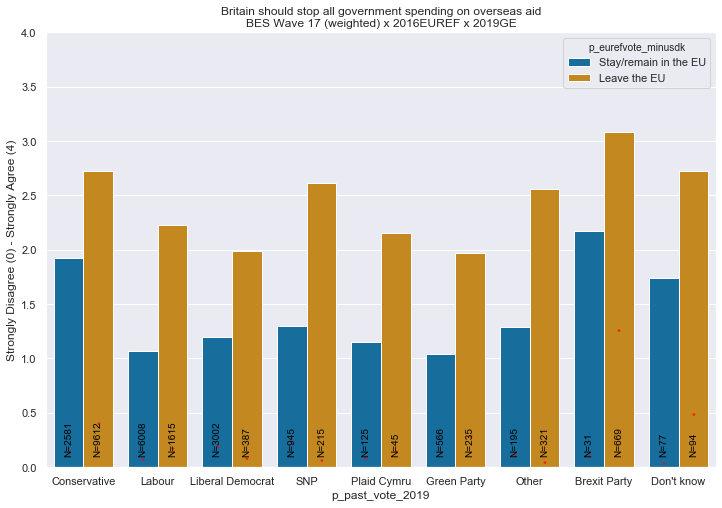

In [190]:
like_var = "overseasAidW17"
wt_var = "wt_new_W17"
vote_var = "p_past_vote_2019"
euref_var = "p_eurefvote_minusdk"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))

df = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).reset_index()
df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
ax = sns.barplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df);
plt.ylim([0,4]);
ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1).values

Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
count = 0
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
            fontsize=10, color='red', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)
    count = count + 1
plt.ylabel("Strongly Disagree (0) - Strongly Agree (4)");
plt.title("Britain should stop all government spending on overseas aid\nBES Wave 17 (weighted) x 2016EUREF x 2019GE");

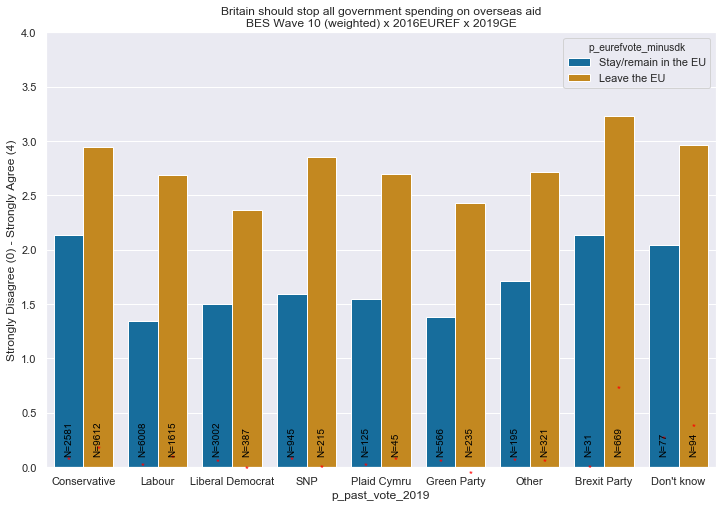

In [193]:
like_var = "overseasAidW10"
wt_var = "wt_new_W10"
vote_var = "p_past_vote_2019"
euref_var = "p_eurefvote_minusdk"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))

df = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).reset_index()
df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
ax = sns.barplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df);
plt.ylim([0,4]);
ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1).values

Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
count = 0
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
            fontsize=10, color='red', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)
    count = count + 1
plt.ylabel("Strongly Disagree (0) - Strongly Agree (4)");
plt.title("Britain should stop all government spending on overseas aid\nBES Wave 10 (weighted) x 2016EUREF x 2019GE");